### Tutorial on Optimized Normalized Cut of an Undirected Graph G
Reference:
[1] Jianbo Shi and Jitendra Malik.
*Normalized Cuts and Image Segmentation*.
<https://www.cis.upenn.edu/~jshi/papers/pami_ncut.pdf>

In [1]:
import sys
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/Optimized_Ncut_Directed_and_Undirected/src')

from Optimized_normalised_cut_undirected import *
from vizualize_nx import *


First, lets build a networkx graph to play with. Please note that this code will run with directed graphs but the results may not be ideal. There is a seperate notbook and .py file for directed graphs.

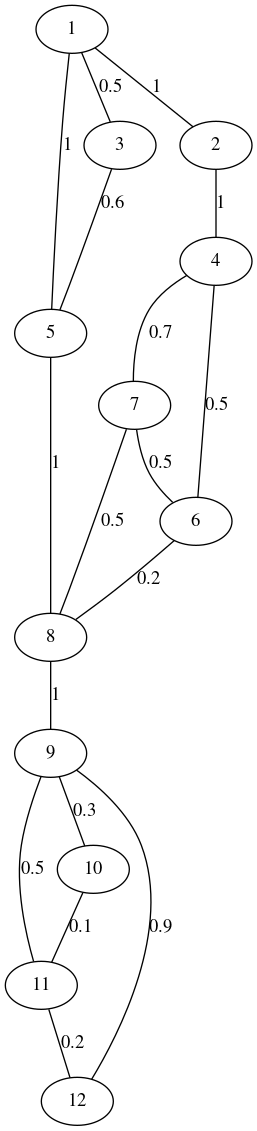

In [2]:
G = nx.Graph()
E = [(1,3), (1,2), (3,5), (5,1), (4,7), (6,7), (4,6), (4, 2), (7,8), (8,6), (8,5), (8,9), (9,10), (9,11), (9,12), (11,12), (10,11)]
w = [.5, 1, .6, 1, .7, .5, .5, 1, .5, .2, 1, 1, .3, .5, .9, .2, .1]

for e in range(len(E)):
    s,t = E[e]
    G.add_edge(s,t, weight = w[e])

view_pydot(G, 'weight')


Now we set a few parameters, if edges are weights then set data to be the edge attribute key for the weight. If this is not specified, then edge weights are automatically set as 1. Similarly, the nodelist is just the set of nodes in G you are trying to find an optimum partition for. Reasing results is easier if the nodes are orders, but this is not required so if it not specified then the nodelist is automatically set to be G.nodes().

In [3]:
data = 'weight'
nodelist = sorted(G.nodes())
nodelist

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Now we look at the weight matrix W and degree matrix D. Notice the W(i,j) entry is the weight of edge i -- j, and the D(i,i) entry is the sum of weights from all edges of node i. 

In [4]:
W = sym_weight_matrix(G, nodelist, data)
W

array([[0. , 1. , 0.5, 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0.5, 0.7, 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0.6, 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.7, 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0.2, 0.5, 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0.3, 0.5, 0.9],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.1, 0. , 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.2, 0. ]])

In [5]:
D = sym_weighted_degree_matrix(G, nodelist, data)
D

array([[2.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 2.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 2.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1.7, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.7, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2.7, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1.1]])

Now we compute the the normalised Laplacian L. i.e., nL = D^(-1/2)(D-W)D^(-1/2) = 1-D^(-1/2)WD^(-1/2). See reference [1] or code for more details. Then we can find the second smallest eigenvector of L and use it to partition the G.

In [6]:
L = normalized_Laplacian(D, W)
ssV = second_smallest_eigval_vec(L)
ssV

[0.2712,
 0.2965,
 0.1524,
 0.2789,
 0.1379,
 0.1454,
 0.1466,
 -0.1119,
 -0.5355,
 -0.2564,
 -0.3692,
 -0.4179]

Of course, all of this can be done with a single function, showing that the partition for the above graph has [1, 2, 3, 4, 5, 6, 7] in one group and [8, 9, 10, 11, 12]. Notice this partition should minimize the normalized cut, which is also returned here as 0.349.

In [7]:
v2, A, B, Ncut = optimized_normalized_cut(G, nodelist, data)
A, B, Ncut

([1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12], 0.3485987696514012)

We can then partition G further just by restricting the nodeset, a visual of the partitions is also shown.

In [8]:
nodelist = A
v2, A1, B1, Ncut = optimized_normalized_cut(G, nodelist, data)
print('Three cluster of G are:', B, A1, B1)

Three cluster of G are: [8, 9, 10, 11, 12] [1, 3, 5] [2, 4, 6, 7]


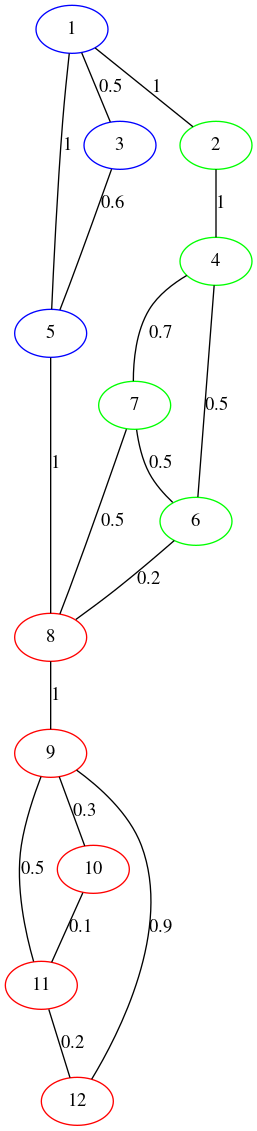

In [9]:
color = {}
for i in G:
    if i in B:
        color[i] = 'red'
    if i in A1:
        color[i] = 'blue'
    if i in B1:
        color[i] = 'green'
nx.set_node_attributes(G, color, 'color')

view_pydot(G, 'weight')